<a href="https://colab.research.google.com/github/AkhileshPandeyji/Udacity-deep-gocolab/blob/master/CatsvsDogswithDataAugandDropouts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

tf.logging.set_verbosity(tf.logging.ERROR)

tf.enable_eager_execution()

print(tf.__version__)



1.14.0


In [0]:
# Data

data_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
data_dir = tf.keras.utils.get_file("cats_and_dogs_filtered.zip",origin=data_url,extract=True)

In [7]:
data_dir_base = os.path.dirname(data_dir)
print(data_dir_base)

!find $data_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats


In [0]:
# data path
data_dir = os.path.join(data_dir_base,"cats_and_dogs_filtered")
train_dir = os.path.join(data_dir,"train")
val_dir = os.path.join(data_dir,"validation")
traincats_dir = os.path.join(train_dir,"cats")
traindogs_dir = os.path.join(train_dir,"dogs")
valcats_dir = os.path.join(val_dir,"cats")
valdogs_dir = os.path.join(val_dir,"dogs")

In [10]:
print(data_dir)
print(train_dir)
print(val_dir)
print(traincats_dir)
print(traindogs_dir)
print(valcats_dir)
print(valdogs_dir)

/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [13]:
# numbers of examples
num_train_dogs = len(os.listdir(traindogs_dir))
num_train_dogs = len(os.listdir(traincats_dir))
num_val_dogs = len(os.listdir(valdogs_dir))
num_val_cats = len(os.listdir(valcats_dir))

num_train_examples = num_train_dogs + num_train_cats
num_val_examples = num_val_dogs + num_val_cats

print(num_train_dogs,num_train_dogs,num_val_dogs,num_val_cats,num_train_examples,num_val_examples)

1000 1000 500 500 2000 1000


In [0]:
# preprocessing data
train_data_gen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,shear_range=0.2,zoom_range=0.5,rotation_range=45,width_shift_range=0.2,height_shift_range=0.2,fill_mode="nearest")
val_data_gen = ImageDataGenerator(rescale=1./255)

In [16]:
BATCH_SIZE = 100
IMG_SIZE = 150
train_data_g = train_data_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=train_dir,
                                                 target_size=(IMG_SIZE,IMG_SIZE),
                                                 shuffle=True,
                                                 class_mode='binary')

val_data_g = val_data_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=val_dir,
                                                 target_size=(IMG_SIZE,IMG_SIZE),
                                                 shuffle=False,
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
# Building model

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(IMG_SIZE,IMG_SIZE,3),activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=2,activation=tf.nn.softmax)
])

In [0]:
# compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [22]:
# Fitting the model
EPOCHS = 50
history = model.fit_generator(train_data_g,
                             epochs=EPOCHS,
                             steps_per_epoch=int(np.ceil(num_train_examples/float(BATCH_SIZE))),
                             validation_data=val_data_g,
                             validation_steps=int(np.ceil(num_val_examples/float(BATCH_SIZE)))
                             )


Epoch 1/50
20/20 [==============================] - 20s 979ms/step - loss: 0.7369 - acc: 0.5180 - val_loss: 0.6909 - val_acc: 0.5000
Epoch 2/50
20/20 [==============================] - 15s 743ms/step - loss: 0.6914 - acc: 0.5320 - val_loss: 0.6848 - val_acc: 0.5260
Epoch 3/50
20/20 [==============================] - 15s 746ms/step - loss: 0.6898 - acc: 0.5290 - val_loss: 0.6743 - val_acc: 0.5840
Epoch 4/50
20/20 [==============================] - 15s 747ms/step - loss: 0.6799 - acc: 0.5460 - val_loss: 0.6502 - val_acc: 0.6020
Epoch 5/50
20/20 [==============================] - 15s 750ms/step - loss: 0.6596 - acc: 0.5930 - val_loss: 0.6504 - val_acc: 0.6190
Epoch 6/50
20/20 [==============================] - 15s 740ms/step - loss: 0.6562 - acc: 0.5915 - val_loss: 0.6291 - val_acc: 0.6250
Epoch 7/50
20/20 [==============================] - 15s 744ms/step - loss: 0.6463 - acc: 0.6045 - val_loss: 0.6050 - val_acc: 0.6760
Epoch 8/50
20/20 [==============================] - 15s 746ms/step - 

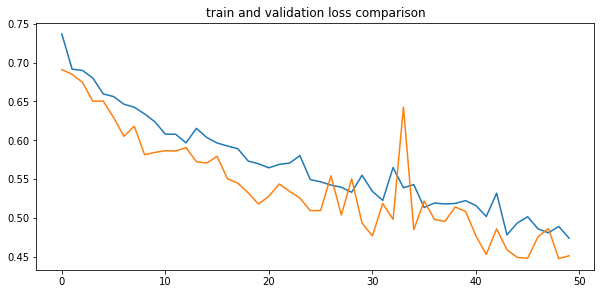

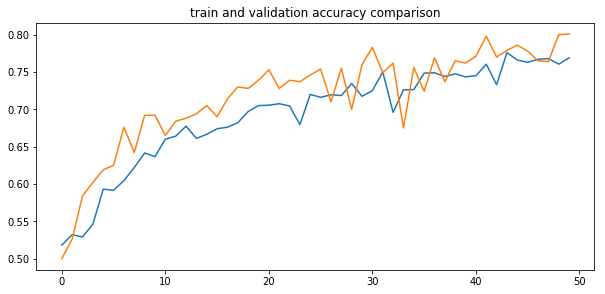

In [26]:
train_loss = history.history['loss']
train_acc= history.history['acc']

val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

epochs = range(EPOCHS)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title("train and validation loss comparison")
plt.plot(epochs,train_loss)
plt.plot(epochs,val_loss)

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
plt.title("train and validation accuracy comparison")
plt.plot(epochs,train_acc)
plt.plot(epochs,val_acc)



  65536/Unknown - 0s 0us/step

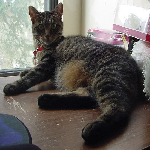

In [39]:
# predicting through the model

# getting the image

image_file = tf.keras.utils.get_file('cat.jpg',"https://farm1.static.flickr.com/42/107018255_929f20ef60.jpg")

image_test = Image.open(image_file).resize((IMG_SIZE,IMG_SIZE))


image_test



In [0]:
# converting the image to right format

image_test = np.array(image_test)/255.0
image_test = image_test[np.newaxis,...]

In [0]:
predictions = model.predict(image_test)

In [42]:
class_labels = ['cat','dog']
predicted_class = class_labels[np.argmax(predictions)]
print(predicted_class)

cat
